## Numerical Differentiation

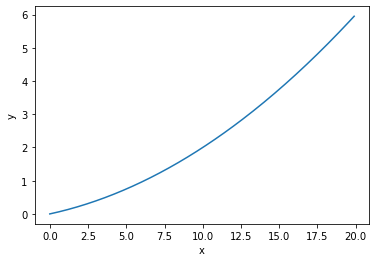

In [8]:
import numpy as np
import matplotlib.pylab as plt

def function_1(x): # define function 1
    return 0.01*x**2 + 0.1*x

def numerical_diff(f, x): # define a derivative
    h = 1e-4 #0.0001
    return (f(x+h) - f(x-h)) / (2*h)

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

In [9]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


## Partial Derivative

In [13]:
def function_2(x): # define function 2 y = x0^2 + x1^2
    return x[0] ** 2 + x[1] ** 2

# x0 = 3, x1 = 4, calculate the PD for x0
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

## Gradient
* **Gradient** is the vector of the all partial derivative for neural network

In [19]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # create a new array, whose values are 0. Its shape is tha same as `x`.
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # calculate f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # calculate f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #the orignal value
        
    return grad

In [20]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

## Gradient Descent

In [29]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):  
    # parameters list: f: the optimization function, init value, learning rate, the number of the repetation of the GD 
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
        
    return x

#### Example for GD
1. f(x0 + x1) = x0^2 + x1^2
2. init: x0 = -3.0, x1 = 4.0
3. learning rate = 0.1
4. repeat 100 times

In [31]:
# def function_2(x): # define function 2 y = x0^2 + x1^2
#     return x[0] ** 2 + x[1] ** 2


init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

#### Show the GD

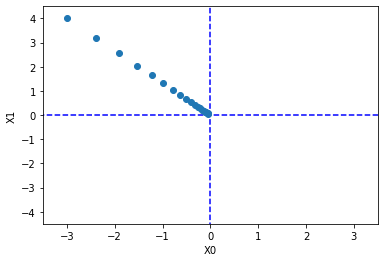

In [35]:
import numpy as np
import matplotlib.pylab as plt
# from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


#### learning rate
1. learning rate is too big
2. learning rate is too small

In [39]:
# too big
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.295

In [40]:
# too small
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

(array([-2.99999994,  3.99999992]), array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.9999

## Conclusion:
1. If the learning rate is too big, the result is too big
2. If the learning rate is too small, the optimization do